# Forex Classification Label

## Import all the crucial libraries

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import scale,MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import timeit
from warnings import filterwarnings
filterwarnings('ignore')

## Import the dataset

In [2]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df= data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


##  Data Exploration

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


### Identifying categorical data

In [5]:
# kategorik değişkenleri görmek istedim
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [6]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

for i in df_categorical:
    print(df_categorical[i].describe())

count      6167
unique        2
top       GREEN
freq       3132
Name: ind_109, dtype: object
count     6167
unique     582
top          ?
freq      1041
Name: ind_420, dtype: object
count     6167
unique     573
top          ?
freq      1041
Name: ind_422, dtype: object


## Encoding and Cleaning the categorical data

In [7]:
df = df.drop(["ind_420", "ind_422"],axis=1)

In [8]:
df_encoded = pd.get_dummies(df, columns = ["ind_109"],drop_first=True)
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,0


## Exploration of Target

In [9]:
df_encoded.corr().abs().iloc[:,130:133]

,20_target,50_target,90_target
ind_5,0.060969,0.068989,0.060428
ind_6,0.062101,0.069652,0.061560
ind_8,0.004126,0.006984,0.006650
ind_9,0.031316,0.004053,0.012093
ind_10,0.016423,0.006654,0.011307
...,...,...,...
ind_428,0.047041,0.052418,0.043563
20_target,1.000000,0.384076,0.355950
50_target,0.384076,1.000000,0.940916
90_target,0.355950,0.940916,1.000000


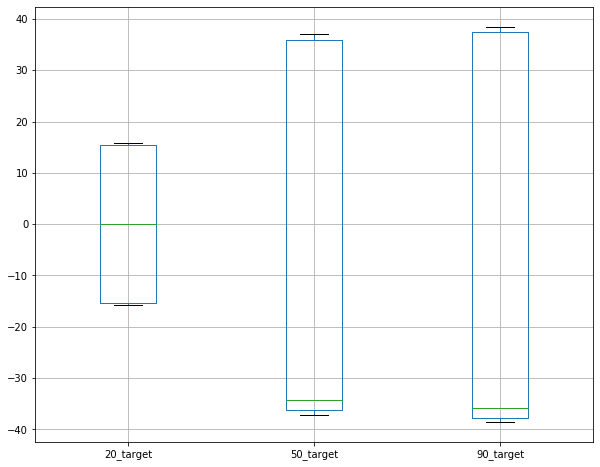

In [10]:
plt.figure(figsize=(10,8))
boxplot_df = df[["20_target", "50_target","90_target"]]
boxplot_df.boxplot()
plt.show()


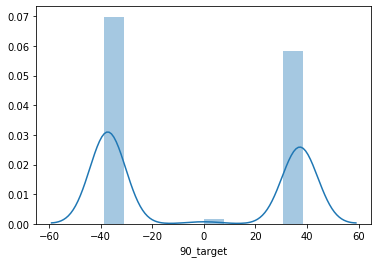

In [11]:
sns.distplot(df_encoded["90_target"]);

In [12]:
df_encoded["90_target"].describe()

count    6167.000000
mean       -3.315072
std        36.841541
min       -38.573858
25%       -37.695273
50%       -35.788391
75%        37.521892
max        38.465649
Name: 90_target, dtype: float64

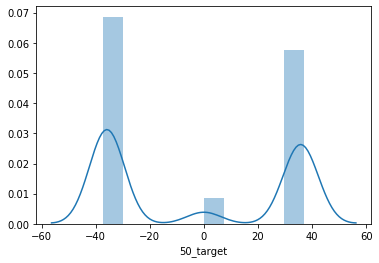

In [13]:
sns.distplot(df_encoded["50_target"]);

In [14]:
df_encoded["50_target"].describe()

count    6167.000000
mean       -2.906358
std        34.559778
min       -37.142889
25%       -36.208094
50%       -34.267756
75%        35.879524
max        37.038694
Name: 50_target, dtype: float64

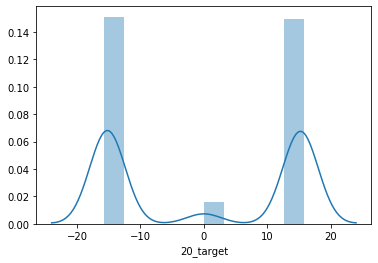

In [15]:
sns.distplot(df_encoded["20_target"]);

In [16]:
df_encoded["20_target"].describe()

count    6167.000000
mean       -0.057102
std        14.834497
min       -15.780588
25%       -15.350354
50%         0.000000
75%        15.385945
max        15.768767
Name: 20_target, dtype: float64

In [17]:
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,0


## Target Labeling

In [18]:
negative = df_encoded.loc[:,:][(df_encoded["90_target"]>-38) 
                               & (df_encoded["90_target"]< -20)]
negative["90_target"] = -1 

notr = df_encoded.loc[:,:][(df_encoded["90_target"]> -10) 
                           & (df_encoded["90_target"]< 10)]
notr["90_target"] = 0

positive = df_encoded.loc[:,:][(df_encoded["90_target"]> 20) 
                               & (df_encoded["90_target"]< 38)]
positive["90_target"] = 1 



In [19]:
df_label = pd.concat([negative, notr, positive])
df_label = df_label.drop(["20_target", "50_target"], axis=1)
df_label.groupby("90_target").count()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_RED
90_target,,,,,,,,,,,,,,,,,,,,,
-1,2521,2521,2521,2521,2521,2521,2521,2521,2521,2521,...,2521,2521,2521,2521,2521,2521,2521,2521,2521,2521
0,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
1,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,...,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425


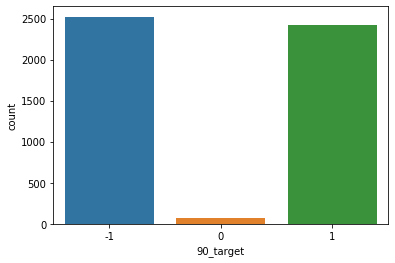

In [20]:
sns.countplot(df_label["90_target"]);

In [21]:
df_label.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,ind_109_RED
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,-1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,-1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-1,0
5,45,41,100.0,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-37,0.005395,8.8,-78.1,-84,1.0,0.794403,0.730549,-1,0
6,49,45,100.0,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-29,0.005749,12.8,-71.7,-84,1.0,0.854144,0.746727,-1,0


## Splitting the dataset

In [22]:
y = df_label["90_target"]
X = df_label.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    shuffle= True)

# Applying Models

## Gaussian Naive Bayes

In [23]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train_scaled, y_train)
gnb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
y_pred = gnb_model.predict(X_test_scaled)

In [26]:
accuracy_score(y_test, y_pred)

0.45302547770700635

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.59      0.53      0.56       638
           0       0.05      0.81      0.10        21
           1       0.60      0.36      0.45       597

    accuracy                           0.45      1256
   macro avg       0.41      0.57      0.37      1256
weighted avg       0.59      0.45      0.50      1256



## Bernoulli Naive Bayes

In [30]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train_scaled, y_train)
bnb_model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [31]:
y_pred = bnb_model.predict(X_test_scaled)

In [32]:
accuracy_score(y_test, y_pred)

0.5796178343949044

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.69      0.63       638
           0       0.00      0.00      0.00        21
           1       0.59      0.48      0.53       597

    accuracy                           0.58      1256
   macro avg       0.39      0.39      0.39      1256
weighted avg       0.57      0.58      0.57      1256



## Multinomial Naive Bayes

In [35]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train_scaled, y_train)
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
y_pred = mnb_model.predict(X_test_scaled)


In [37]:
accuracy_score(y_test, y_pred)

0.5812101910828026

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.66      0.62       638
           0       0.00      0.00      0.00        21
           1       0.58      0.52      0.55       597

    accuracy                           0.58      1256
   macro avg       0.39      0.39      0.39      1256
weighted avg       0.57      0.58      0.58      1256



# Comparison of Models

In [43]:
modeller = [
    gnb_model,
    bnb_model,
    mnb_model,]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test_scaled)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))

----------------------------
GaussianNB:
Accuracy: 45.3025%
----------------------------
BernoulliNB:
Accuracy: 57.9618%
----------------------------
MultinomialNB:
Accuracy: 58.1210%


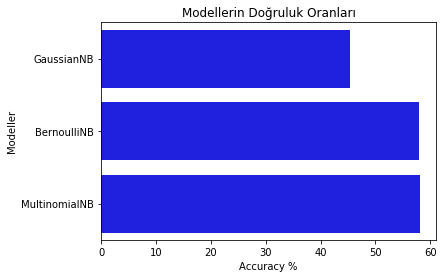

In [45]:
import seaborn as sns
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test_scaled)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    